## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [25]:
%pylab inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans, ttest_ind, ztest, zconfint
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1  Is the distribution of body temperatures normal?

In [18]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [10]:
df.mean()

temperature    98.249231
heart_rate     73.761538
dtype: float64

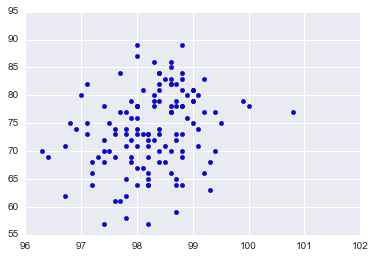

In [11]:
plt.scatter(df.temperature, df.heart_rate)

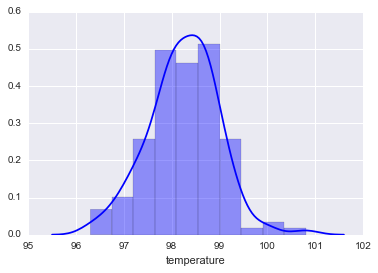

In [15]:
#looks like temperature follows a normal distribution
sns.distplot(df['temperature'],bins=10,color='blue')

In [17]:
import scipy.stats as stats
x=df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since the p-value is 0.25 we can't reject the null hypothesis that the distribution is normal. So we can say that body temp is normally distributed

# 2 Is the true population mean really 98.6 degrees F?

In [26]:
#shows true population mean is not 98.6, p value less than .05, we use a t test because we don't know the population std dev

stats.ttest_1samp(df.temperature, 98.6, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 3 At what temperature should we consider someone's temperature to be "abnormal"?

In [29]:
DescrStatsW(df.temperature).tconfint_mean(alpha = .001)

(98.032682658320084, 98.465778880141443)

below 98 or above 98.4 can be considered "abnormal"

# 4 Is there a significant difference between males and females in normal temperature?

In [30]:
b = df.groupby('gender')
b.mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [34]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

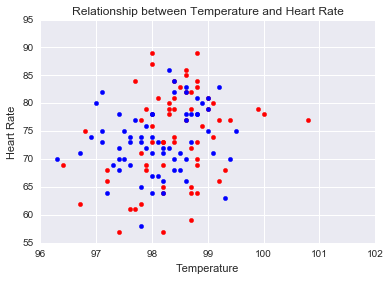

In [31]:
#a much easier way to get two plots with different collors 
M = df[df.gender=='M']
F = df[df.gender=='F']
plt.scatter(F.temperature, F.heart_rate, color = 'red')
plt.scatter(M.temperature, M.heart_rate, color = 'blue')
plt.title("Relationship between Temperature and Heart Rate")
plt.xlabel("Temperature")
plt.ylabel("Heart Rate")

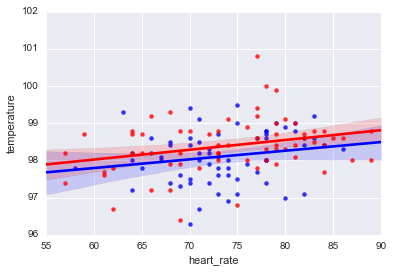

In [32]:
#shows the trend lines for temperate and heart rate with Females and Males
sns.regplot(y="temperature", x="heart_rate", data=M, color = "blue", fit_reg = True)
sns.regplot(y="temperature", x="heart_rate", data=F, color = "red", fit_reg = True)

In [33]:
b = df.groupby('gender')
b.max()

,temperature,heart_rate
gender,,
F,100.8,89.0
M,99.5,86.0


In [35]:
stats.ks_2samp(M.temperature, F.temperature)

Ks_2sampResult(statistic=0.18461538461538457, pvalue=0.19539014047941772)

Since the p-value is .19 there does not appear to be a significant difference between males and females in normal temp